In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("laptop_data.csv")

In [3]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
df.shape

(1303, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [7]:
df.duplicated().sum()

29

In [8]:
df.drop_duplicates().shape

(1274, 11)

In [9]:
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [10]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### Data Cleaning and Feature Engineering

In [11]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [12]:
df["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [13]:
df["TypeName"].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


####  ScreenResolution Feature

In [15]:
df["ScreenResolution"].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

Touch Screen

In [16]:
df["Touchscreen"] = df["ScreenResolution"].apply(
    lambda x: 1 if "Touchscreen" in x else 0
)

IPS panel

In [17]:
df["IPS panel"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS Panel" in x else 0)

Full HD

In [18]:
df["Full HD"] = df["ScreenResolution"].apply(lambda x: 1 if "Full HD" in x else 0)


4K Ultra HD

In [19]:
df["4K Ultra HD"] = df["ScreenResolution"].apply(
    lambda x: 1 if "4K Ultra HD" in x else 0
)

In [20]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS panel,Full HD,4K Ultra HD
1208,Acer,Notebook,17.3,1600x900,Intel Core i3 6006U 2.0GHz,8GB,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.3kg,33513.1200,0,0,0,0
953,Asus,2 in 1 Convertible,12.5,Full HD 1920x1080,Intel Core M M7-6Y75 1.2GHz,8GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,61751.5200,0,0,1,0
356,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,No OS,2.2kg,17155.6272,0,0,0,0


Screen Width

In [21]:
df["Screen width"] = (
    df["ScreenResolution"].str.split().apply(lambda x: x[-1]).str.split("x").str.get(0)
).astype("int64")

Screen Height

In [22]:
df["Screen height"] = (
    df["ScreenResolution"].str.split().apply(lambda x: x[-1]).str.split("x").str.get(1)
).astype("int64")

PPI (pixels per inch)

In [23]:
df["ppi"] = (df["Screen height"] ** 2 + df["Screen width"] ** 2).apply(np.sqrt) / df[
    "Inches"
]

In [24]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS panel,Full HD,4K Ultra HD,Screen width,Screen height,ppi
794,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8GB,512GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.920kg,62071.2,0,1,0,0,2304,1440,226.415547


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS panel         1303 non-null   int64  
 13  Full HD           1303 non-null   int64  
 14  4K Ultra HD       1303 non-null   int64  
 15  Screen width      1303 non-null   int64  
 16  Screen height     1303 non-null   int64  


In [26]:
df["Cpu"].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

#### CPU

In [27]:
df["Cpu_type"] = df["Cpu"].str.split().str.slice(0, 3).str.join(" ")

In [28]:
df["Cpu"] = df["Cpu"].str.split().str.slice(0, 3).str.join(" ")

In [29]:
def check(x):
    if x == "Intel Core i5" or x == "Intel Core i3" or x == "Intel Core i7":
        return x
    elif x.split()[0] == "Intel":
        return "Other Intel Processor"
    else:
        return "AMD Processor"

In [30]:
def check(x):
    if x == "Intel Core i5" or x == "Intel Core i3" or x == "Intel Core i7":
        return x
    elif x.split()[0] == "Intel":
        return "Other Intel Processor"
    else:
        return "AMD Processor"

In [31]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS panel,Full HD,4K Ultra HD,Screen width,Screen height,ppi,Cpu_type
317,Lenovo,Notebook,13.3,1366x768,Intel Celeron Dual,4GB,16GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45kg,24503.472,0,0,0,0,1366,768,117.826530,Intel Celeron Dual
822,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.13kg,133146.720,0,1,1,0,1920,1080,157.350512,Intel Core i7
535,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93kg,72940.320,0,0,1,0,1920,1080,141.211998,Intel Core i7
342,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i3,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.1kg,38148.480,0,1,1,0,1920,1080,141.211998,Intel Core i3
1093,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5,4GB,256GB SSD,AMD Radeon 530,Windows 10,1.4kg,43601.688,0,1,1,0,1920,1080,165.632118,Intel Core i5


In [32]:
df.drop(columns=["Cpu_type"])

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS panel,Full HD,4K Ultra HD,Screen width,Screen height,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,0,0,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,0,0,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,0,0,2560,1600,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1,1,1,0,1920,1080,157.350512
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1,1,0,0,3200,1800,276.053530
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0,0,0,0,1366,768,111.935204
1301,HP,Notebook,15.6,1366x768,Intel Core i7,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0,0,0,0,1366,768,100.454670


#### Ram

In [33]:
df["Ram"].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [34]:
df["Ram"] = df["Ram"].str.replace("GB", "")

In [35]:
df["Ram"] = df["Ram"].astype("int64")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS panel         1303 non-null   int64  
 13  Full HD           1303 non-null   int64  
 14  4K Ultra HD       1303 non-null   int64  
 15  Screen width      1303 non-null   int64  
 16  Screen height     1303 non-null   int64  


In [37]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS panel,Full HD,4K Ultra HD,Screen width,Screen height,ppi,Cpu_type
485,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.75kg,55890.72,0,1,1,0,1920,1080,157.350512,Intel Core i5
329,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7,32,1TB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06kg,140605.92,1,0,0,1,3840,2160,282.423996,Intel Core i7
707,Lenovo,Workstation,15.6,Full HD 1920x1080,Intel Core i7,16,512GB SSD,Nvidia Quadro M520M,Windows 7,2.18kg,98834.40,0,0,1,0,1920,1080,141.211998,Intel Core i7


### Memory

In [38]:
df["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [39]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [40]:
df["new_memory"] = df["Memory"].str.replace("GB", "").str.replace("TB", "000")

In [41]:
df["new_memory"].str.split("+").tail(50)

1253                 [256 SSD]
1254                 [500 HDD]
1255                [1000 HDD]
1256    [128 SSD ,   1000 HDD]
1257                 [500 HDD]
1258           [1.0000 Hybrid]
1259    [128 SSD ,   1000 HDD]
1260                 [128 SSD]
1261                 [512 SSD]
1262                [1000 HDD]
1263                 [500 HDD]
1264                 [500 HDD]
1265                [1000 HDD]
1266           [1.0000 Hybrid]
1267                [1000 HDD]
1268        [32 Flash Storage]
1269                 [500 HDD]
1270                 [128 SSD]
1271                 [512 SSD]
1272        [64 Flash Storage]
1273                [1000 HDD]
1274                 [500 HDD]
1275                 [512 SSD]
1276                [1000 HDD]
1277                 [500 HDD]
1278                 [500 HDD]
1279                [1000 HDD]
1280           [1.0000 Hybrid]
1281                [1000 HDD]
1282        [32 Flash Storage]
1283                 [500 HDD]
1284                 [128 SSD]
1285    

In [42]:
sp = df["Memory"].str.split("+", expand=True)

In [43]:
sp1 = sp[0]

In [44]:
sp[0] = sp[0].apply(
    lambda x: (
        str(float(x.split()[0].replace("TB", "")) * 1024)
        + " "
        + " ".join(x.split()[1:])
        if "TB" in x.split()[0]
        else x.split()[0].replace("GB", "") + " " + " ".join(x.split()[1:])
    )
)

In [45]:
sp[1]

0       None
1       None
2       None
3       None
4       None
        ... 
1298    None
1299    None
1300    None
1301    None
1302    None
Name: 1, Length: 1303, dtype: object

In [46]:
def converts(x):
    if x is None:
        return "0"
    else:
        if "TB" in x:
            return (
                str(round((float(x.split()[0].replace("TB", "")) * 1024)))
                + " "
                + " ".join(x.split()[1:])
            )
        else:
            return x.split()[0].replace("GB", "") + " ".join(x.split()[1:])
    # str((float(x.split()[0].replace("TB",""))*1024))+' '.join(x.split()[1:] if 'TB' in x else x.split()[0].replace("GB","")+' '.join(x.split()[1:]) if x is not None else 0)


sp[1] = sp[1].apply(converts)

In [47]:
sp[1]

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: 1, Length: 1303, dtype: object

In [48]:
ssd1 = sp[0].apply(lambda x: 1 if "SSD" in x else 0)
hdd1 = sp[0].apply(lambda x: 1 if "HDD" in x else 0)
fs1 = sp[0].apply(lambda x: 1 if "Flash Storage" in x else 0)
hybrid1 = sp[0].apply(lambda x: 1 if "Hybrid" in x else 0)

In [49]:
ssd2 = sp[1].apply(lambda x: 1 if "SSD" in x else 0)
hdd2 = sp[1].apply(lambda x: 1 if "HDD" in x else 0)
fs2 = sp[1].apply(lambda x: 1 if "Flash Storage" in x else 0)
hybrid2 = sp[1].apply(lambda x: 1 if "Hybrid" in x else 0)

In [50]:
ssd1 = (round(sp[0].str.split().str.get(0)).astype("float")) * ssd1
hdd1 = (sp[0].str.split().str.get(0).astype("float")) * hdd1
fs1 = (sp[0].str.split().str.get(0).astype("float")) * fs1
hybrid1 = (sp[0].str.split().str.get(0).astype("float")) * hybrid1
ssd2 = (sp[0].str.split().str.get(0).astype("float")) * ssd2
hdd2 = (sp[0].str.split().str.get(0).astype("float")) * hdd2
fs2 = (sp[0].str.split().str.get(0).astype("float")) * fs2
hybrid2 = (sp[0].str.split().str.get(0).astype("float")) * hybrid2

In [51]:
df["SSD"] = ssd1 + ssd2
df["HDD"] = hdd1 + hdd2
df["Flash Storage"] = fs1 + fs2
df["hybrid"] = hybrid1 + hybrid2

#### GPU

In [52]:
df["Gpu"].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [53]:
df["GPU_type"] = df["Gpu"].apply(lambda x: x.split()[0])

In [54]:
df["GPU_type"].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [55]:
df["GPU_type"].value_counts()

GPU_type
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

#### Weight

In [56]:
df["Weight"].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [57]:
df["Weight"] = df["Weight"].str.replace("kg", "")

In [58]:
df["Weight"] = df["Weight"].astype("float64")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS panel         1303 non-null   int64  
 13  Full HD           1303 non-null   int64  
 14  4K Ultra HD       1303 non-null   int64  
 15  Screen width      1303 non-null   int64  
 16  Screen height     1303 non-null   int64  


Text(0.5, 1.0, 'Reation Beteen the Inches and Price')

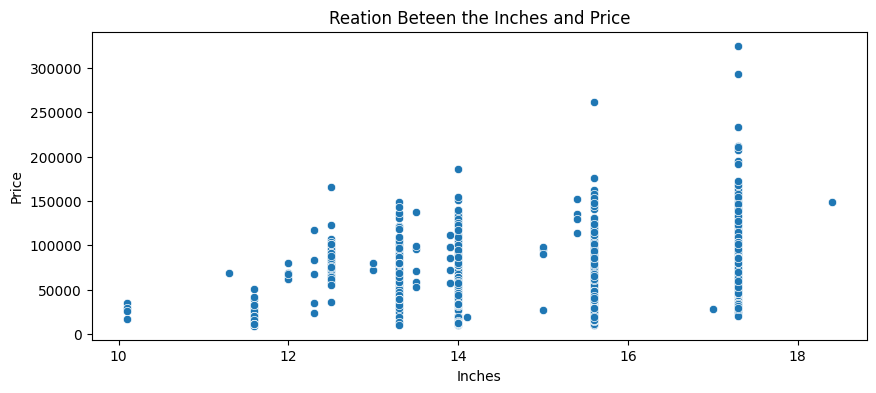

In [60]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x="Inches", y="Price", data=df)
plt.title("Reation Beteen the Inches and Price")

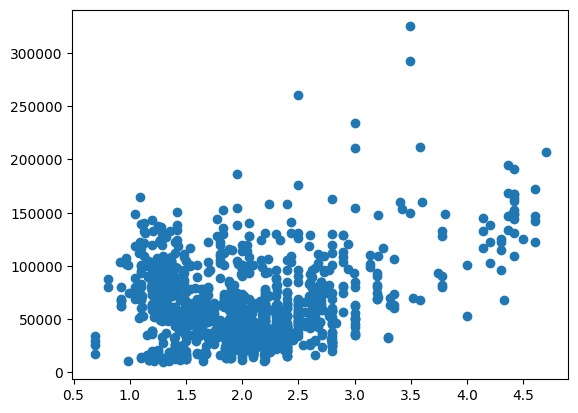

In [61]:
plt.scatter(df["Weight"], df["Price"])

### Price

In [62]:
df["Price"].unique()

array([ 71378.6832,  47895.5232,  30636.    , 135195.336 ,  96095.808 ,
        21312.    , 114017.6016,  61735.536 ,  79653.6   ,  41025.6   ,
        20986.992 ,  18381.0672, 130001.6016,  26581.392 ,  67260.672 ,
        80908.344 ,  39693.6   , 152274.24  ,  26586.72  ,  52161.12  ,
        10224.432 ,  53226.72  ,  13746.24  ,  43636.32  ,  35111.52  ,
        22305.1392,  58554.72  ,  42624.    ,  69157.44  ,  47738.88  ,
        13053.0672,  10602.72  ,  23389.92  ,  99580.32  ,  53173.44  ,
        13266.72  ,  19553.76  ,  26037.4032,  46833.12  ,  20725.92  ,
        79866.72  ,  27864.9072,  36336.96  ,  75604.32  ,  19660.32  ,
        69210.72  ,  34045.92  ,  24828.48  ,  16996.32  ,  44808.48  ,
        21231.5472,  58767.84  ,  20459.52  ,  40908.384 ,  31232.2032,
       130482.72  ,  22111.2   ,  31914.72  ,  50136.48  ,  36763.2   ,
       105654.24  ,  23373.4032,  12201.12  ,  29250.72  ,  50562.72  ,
        58021.92  ,  50882.4   ,  46353.6   ,  58341.6   ,  2765

In [63]:
df["Price"] = round(df["Price"])

In [64]:
df["Price"] = df["Price"].astype("int64")

C:\Users\admin\AppData\Local\Temp\ipykernel_2192\1703126332.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


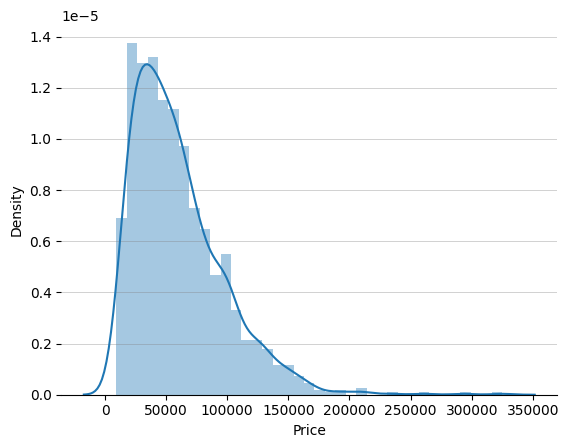

In [65]:
sns.distplot(df["Price"])
# background_color_rgb = (224/255, 238/255, 241/255)
plt.grid(axis="y", linestyle="-", linewidth=0.5, color="gray", alpha=0.5)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
# plt.gcf().set_facecolor(background_color_rgb)

In [66]:
def check_otliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lw = q1 - (1.5 * iqr)
    up = q3 + (1.5 * iqr)
    return lw, up

In [67]:
lw, up = check_otliers("Price")

In [68]:
lw, up

(-39123.5, 150312.5)

In [69]:
df["Price"] = df["Price"].apply(lambda x: lw if x < lw else (up if x > up else x))

C:\Users\admin\AppData\Local\Temp\ipykernel_2192\941010651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

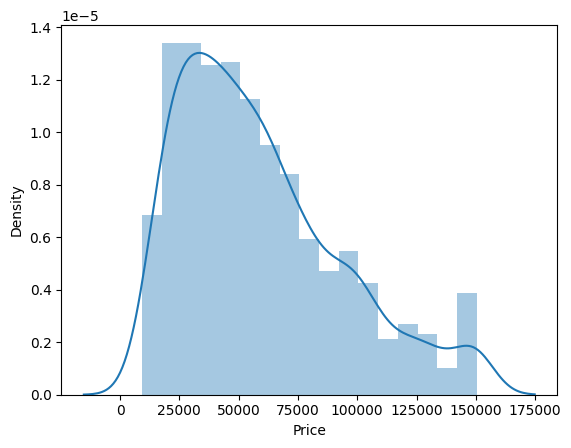

In [70]:
sns.distplot(df["Price"])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS panel         1303 non-null   int64  
 13  Full HD           1303 non-null   int64  
 14  4K Ultra HD       1303 non-null   int64  
 15  Screen width      1303 non-null   int64  
 16  Screen height     1303 non-null   int64  


## Data analysis


In [72]:
df["Company"].value_counts().sort_index()

Company
Acer         103
Apple         21
Asus         158
Chuwi          3
Dell         297
Fujitsu        3
Google         3
HP           274
Huawei         2
LG             3
Lenovo       297
MSI           54
Mediacom       7
Microsoft      6
Razer          7
Samsung        9
Toshiba       48
Vero           4
Xiaomi         4
Name: count, dtype: int64

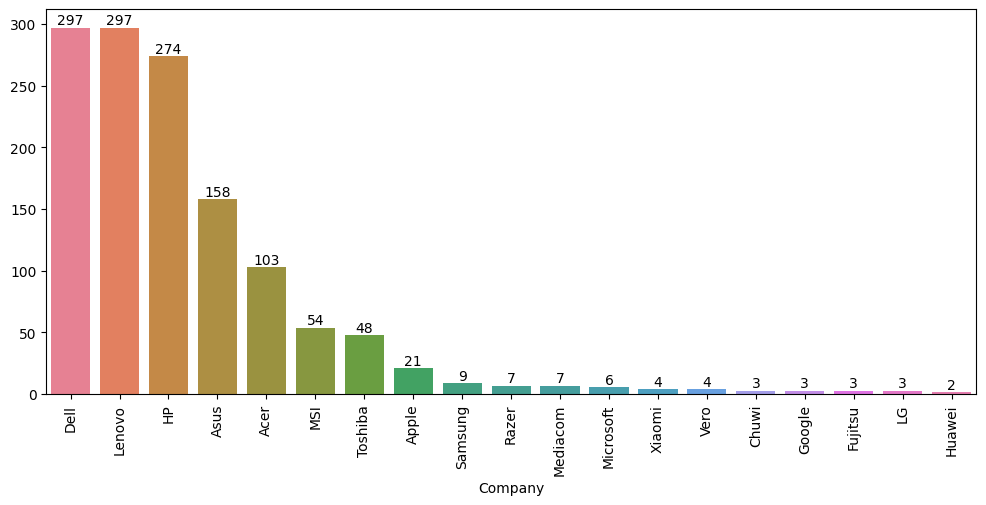

In [73]:
val = df["Company"].value_counts()
plt.figure(figsize=(12, 5))
sns.barplot(x=val.index, y=val.values, hue=val.index)
plt.xticks(rotation="vertical")
for index, value in enumerate(val):
    plt.text(index, value, str(value), ha="center", va="bottom")
plt.show()

In [74]:
df["TypeName"].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [75]:
df["TypeName"].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

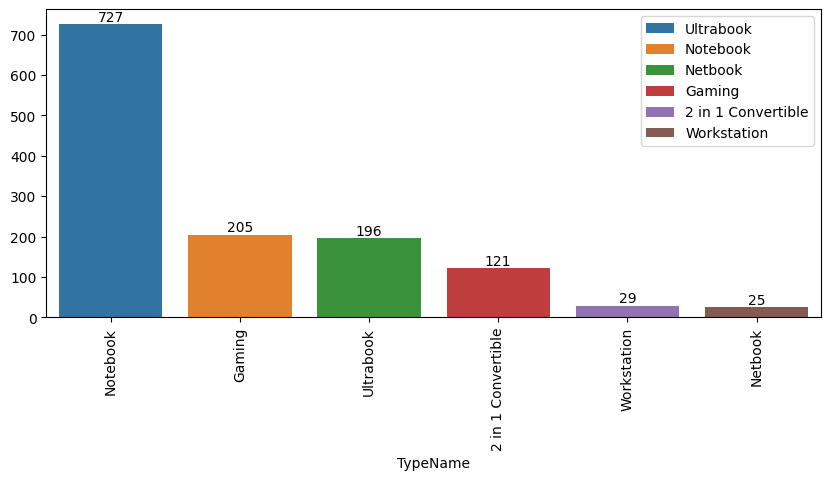

In [76]:
val = df["TypeName"].value_counts()
plt.figure(figsize=(10, 4))
sns.barplot(x=val.index, y=val.values, hue=df["TypeName"].unique())
plt.xticks(rotation="vertical")
for index, value in enumerate(val):
    plt.text(index, value, str(value), ha="center", va="bottom")
plt.show()

Text(0.5, 1.0, 'Reation Beteen the Inches and Price')

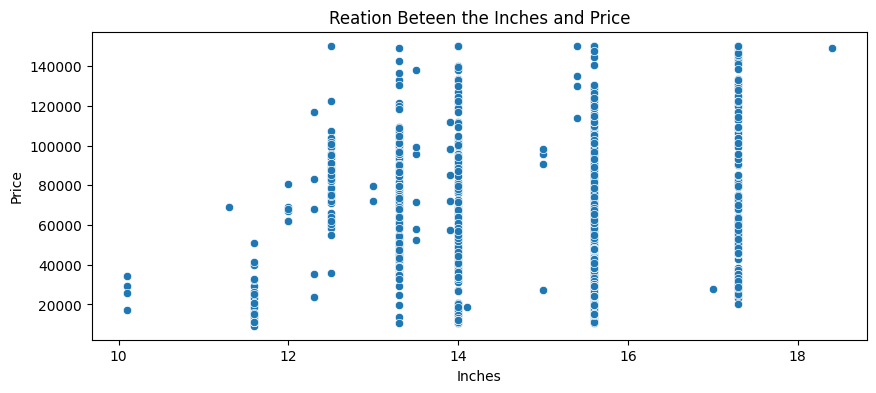

In [77]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x="Inches", y="Price", data=df)
plt.title("Reation Beteen the Inches and Price")

### Ram

In [78]:
df["Ram"].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)

In [79]:
df["Ram"].value_counts().sort_index()

Ram
2      22
4     375
6      41
8     619
12     25
16    200
24      3
32     17
64      1
Name: count, dtype: int64

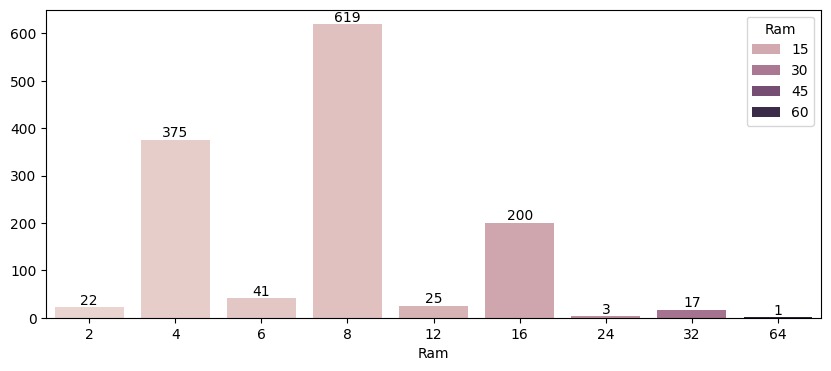

In [80]:
plt.figure(figsize=(10, 4))
val = df["Ram"].value_counts().sort_index()
sns.barplot(x=val.index, y=val.values, hue=val.index)
for index, value in enumerate(val):
    plt.text(index, value, str(value), ha="center", va="bottom")

In [81]:
df["cpu brand"].unique()

KeyError: 'cpu brand'

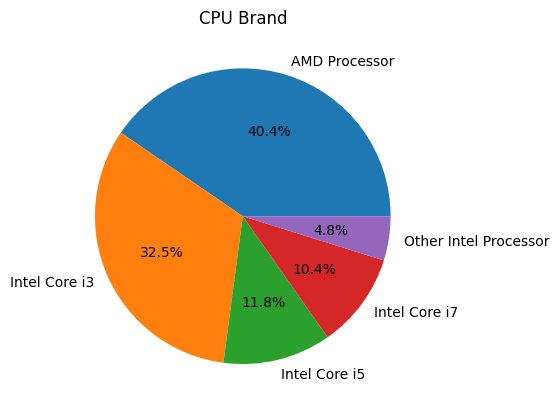

In [ ]:
plt.pie(
    df["cpu brand"].value_counts(),
    labels=sorted(df["cpu brand"].unique()),
    autopct="%.1f%%",
)
plt.title("CPU Brand")
plt.show()

In [ ]:
memory_type = {
    "SSD": df["SSD"].count() - 460,
    "HDD": df["HDD"].count() - 727,
    "Flash Storage": df["Flash Storage"].count() - 1228,
    "Hybrid": df["hybrid"].count() - 1291,
}

<Axes: >

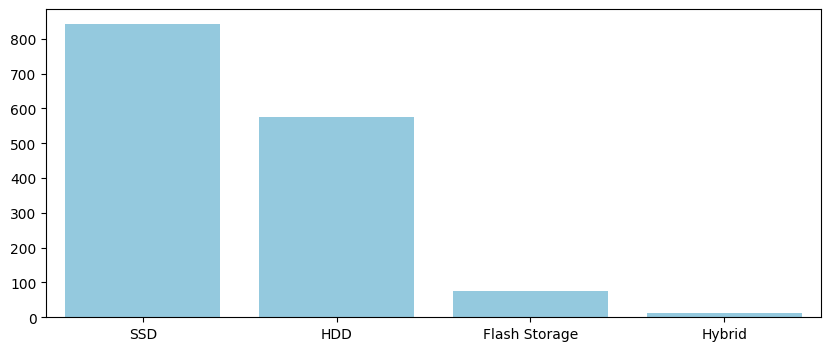

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x=list(memory_type.keys()), y=list(memory_type.values()), color="skyblue")
# for index, value in enumerate(memory_type):
#     plt.text(index, value, str(value), ha="center", va="bottom")

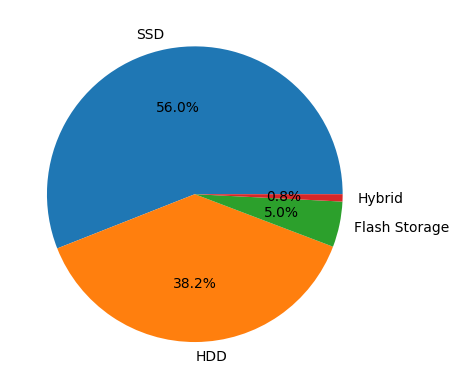

In [ ]:
plt.pie(list(memory_type.values()), labels=list(memory_type.keys()), autopct="%1.1f%%")
plt.show()

In [ ]:
df["SSD"].value_counts()

SSD
256.0     498
0.0       460
128.0     172
512.0     138
1024.0     18
32.0        6
180.0       5
16.0        3
64.0        1
240.0       1
8.0         1
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_5788\4264509543.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  val = df["SSD"].value_counts().sort_index()[1:]


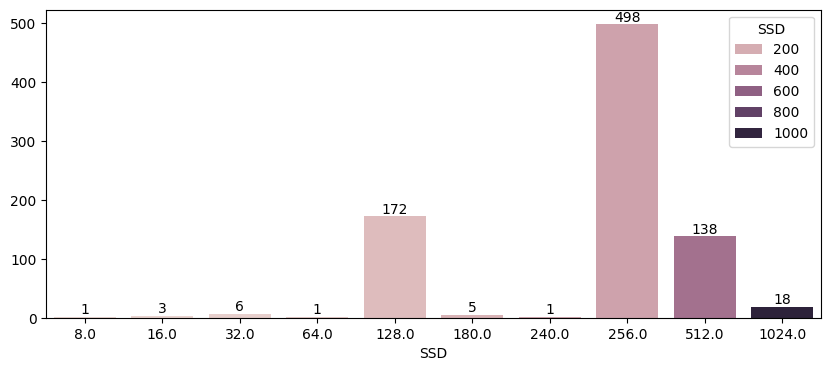

In [ ]:
plt.figure(figsize=(10, 4))
val = df["SSD"].value_counts().sort_index()[1:]
sns.barplot(x=val.index, y=val.values, hue=val.index)
for index, value in enumerate(val):
    plt.text(index, value, str(value), ha="center", va="bottom")

In [ ]:
df["HDD"].value_counts()

HDD
0.0       727
1024.0    226
500.0     132
128.0      97
256.0      85
2048.0     17
512.0      17
64.0        1
32.0        1
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_5788\1443554995.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  val = df["HDD"].value_counts().sort_index()[1:]


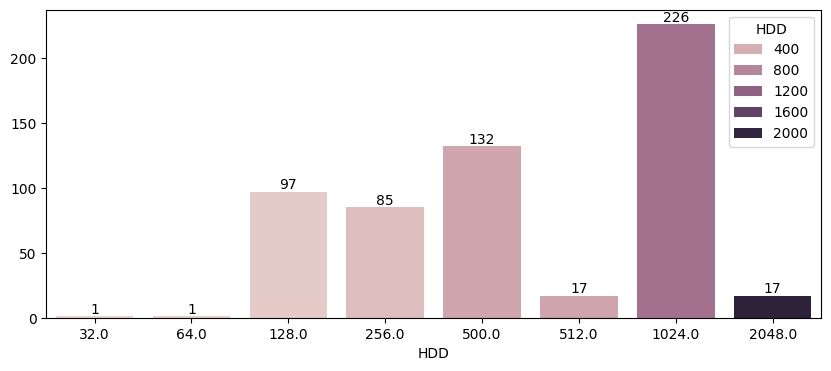

In [ ]:
plt.figure(figsize=(10, 4))
val = df["HDD"].value_counts().sort_index()[1:]
sns.barplot(x=val.index, y=val.values, hue=val.index)
for index, value in enumerate(val):
    plt.text(index, value, str(value), ha="center", va="bottom")

In [ ]:
df["Flash Storage"].value_counts()

Flash Storage
0.0      1228
32.0       38
64.0       16
256.0       8
16.0        7
128.0       4
512.0       2
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_5788\151449958.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  val = df["Flash Storage"].value_counts().sort_index()[1:]


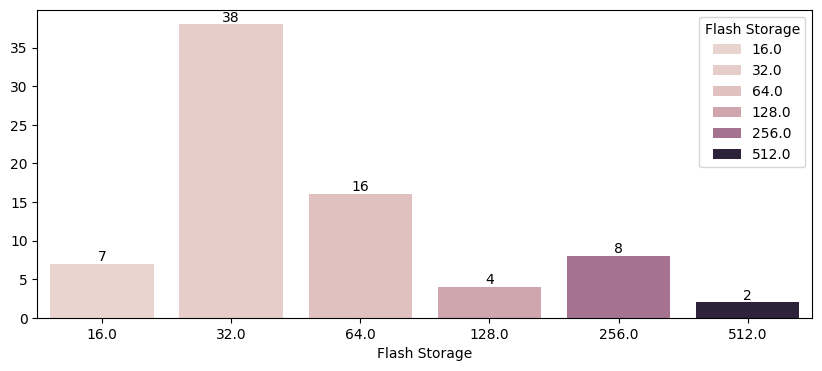

In [ ]:
plt.figure(figsize=(10, 4))
val = df["Flash Storage"].value_counts().sort_index()[1:]
sns.barplot(x=val.index, y=val.values, hue=val.index)
for index, value in enumerate(val):
    plt.text(index, value, str(value), ha="center", va="bottom")

In [ ]:
df["hybrid"].value_counts()

hybrid
0.0       1291
1024.0       9
508.0        1
512.0        1
256.0        1
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_5788\3480658971.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  val = df["hybrid"].value_counts().sort_index()[1:]


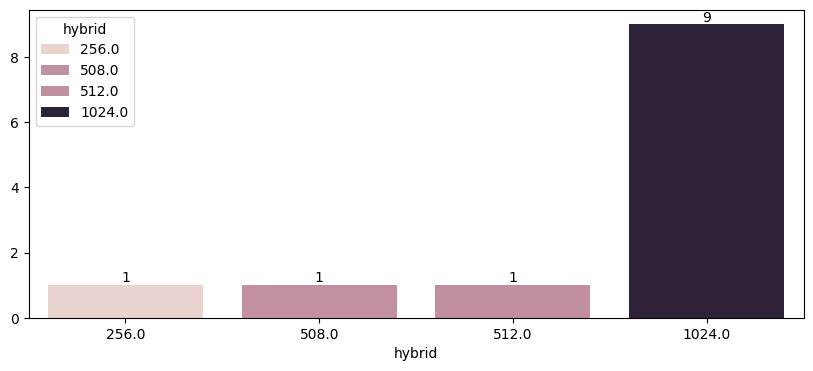

In [ ]:
plt.figure(figsize=(10, 4))
val = df["hybrid"].value_counts().sort_index()[1:]
sns.barplot(x=val.index, y=val.values, hue=val.index)
for index, value in enumerate(val):
    plt.text(index, value, str(value), ha="center", va="bottom")

In [ ]:
df["GPU_type"].value_counts()

GPU_type
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

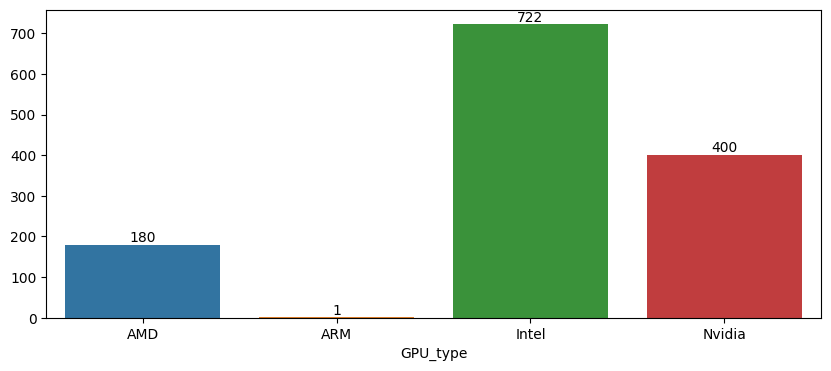

In [ ]:
plt.figure(figsize=(10, 4))
val = df["GPU_type"].value_counts().sort_index()
sns.barplot(x=val.index, y=val.values, hue=val.index)
for index, value in enumerate(val):
    plt.text(index, value, str(value), ha="center", va="bottom")

In [ ]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

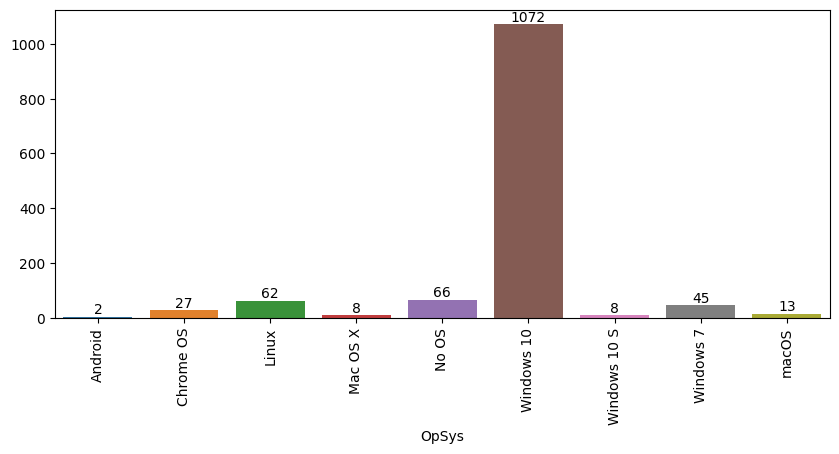

In [ ]:
plt.figure(figsize=(10, 4))
val = df["OpSys"].value_counts().sort_index()
sns.barplot(x=val.index, y=val.values, hue=val.index)
for index, value in enumerate(val):
    plt.text(index, value, str(value), ha="center", va="bottom")
plt.xticks(rotation="vertical")
plt.show()

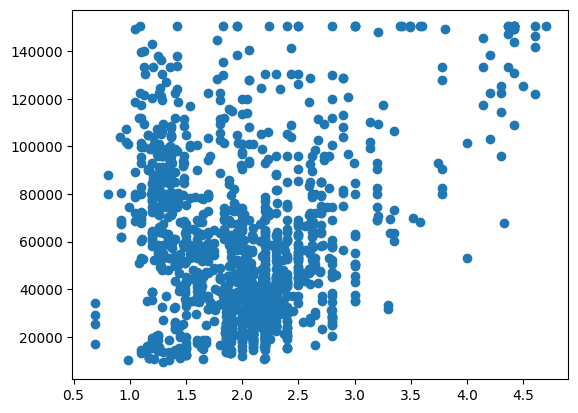

In [ ]:
plt.scatter(df["Weight"], df["Price"])

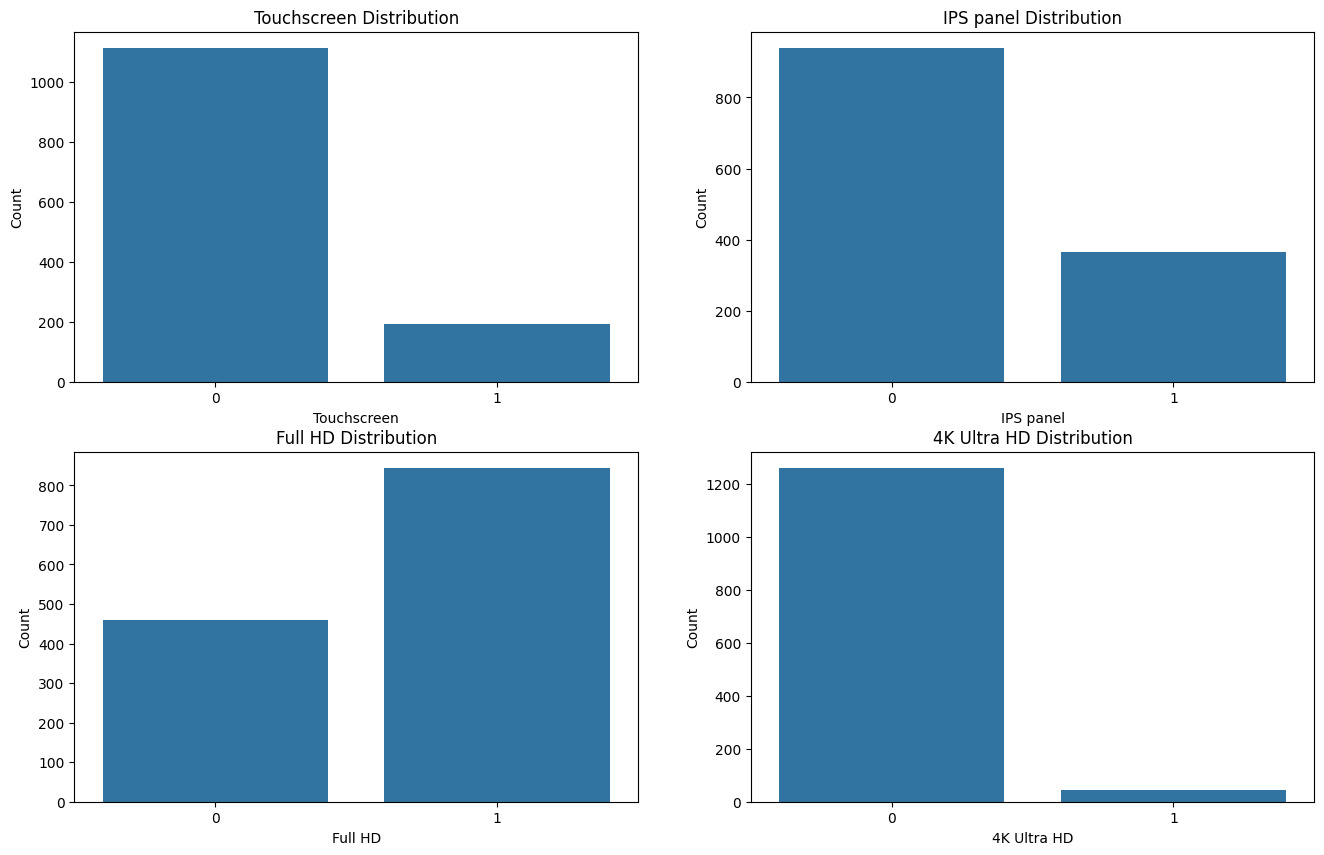

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten()
columns = ["Touchscreen", "IPS panel", "Full HD", "4K Ultra HD"]

for i, column in enumerate(columns):
    val = df[column].value_counts().sort_index()
    sns.barplot(x=val.index, y=val.values, ax=axes[i])
    axes[i].set_title(f"{column} Distribution")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
plt.show()

<Axes: xlabel='ppi', ylabel='Price'>

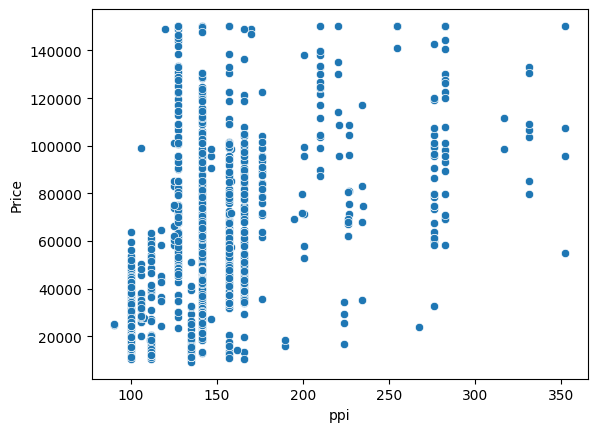

In [ ]:
sns.scatterplot(x=df["ppi"], y=df["Price"])

In [ ]:
df["cpu brand"].value_counts()

cpu brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

In [ ]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'IPS panel',
       'Full HD', '4K Ultra HD', 'Screen width', 'Screen height', 'ppi',
       'Cpu_type', 'cpu brand', 'new_memory', 'SSD', 'HDD', 'Flash Storage',
       'hybrid', 'GPU_type'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS panel         1303 non-null   int64  
 13  Full HD           1303 non-null   int64  
 14  4K Ultra HD       1303 non-null   int64  
 15  Screen width      1303 non-null   int64  
 16  Screen height     1303 non-null   int64  


In [ ]:
df.to_csv("new_data.csv", index=False)

### Prediction

In [ ]:
df = df.drop(
    columns=[
        "Inches",
        "ScreenResolution",
        "Cpu",
        "Gpu",
        "Memory",
        "Screen width",
        "Screen height",
        "Cpu_type",
        "new_memory",
    ]
)

In [ ]:
df.head(3)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS panel,Full HD,4K Ultra HD,ppi,cpu brand,SSD,HDD,Flash Storage,hybrid,GPU_type
0,Apple,Ultrabook,8,macOS,1.37,71379.0,0,1,0,0,226.983005,Intel Core i5,128.0,0.0,0.0,0.0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47896.0,0,0,0,0,127.677940,Intel Core i5,0.0,0.0,128.0,0.0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0,0,0,1,0,141.211998,Intel Core i5,256.0,0.0,0.0,0.0,Intel


In [ ]:
x = df[
    [
        "Company",
        "TypeName",
        "Ram",
        "OpSys",
        "Weight",
        "Touchscreen",
        "IPS panel",
        "Full HD",
        "4K Ultra HD",
        "cpu brand",
        "SSD",
        "HDD",
        "Flash Storage",
        "hybrid",
        "ppi",
        "GPU_type",
    ]
]

y = df["Price"]

In [ ]:
x.head(3)

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS panel,Full HD,4K Ultra HD,cpu brand,SSD,HDD,Flash Storage,hybrid,ppi,GPU_type
0,Apple,Ultrabook,8,macOS,1.37,0,1,0,0,Intel Core i5,128.0,0.0,0.0,0.0,226.983005,Intel
1,Apple,Ultrabook,8,macOS,1.34,0,0,0,0,Intel Core i5,0.0,0.0,128.0,0.0,127.677940,Intel
2,HP,Notebook,8,No OS,1.86,0,0,1,0,Intel Core i5,256.0,0.0,0.0,0.0,141.211998,Intel


In [ ]:
x.shape, y.shape

((1303, 16), (1303,))

# Linerar regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=65
)

In [ ]:
scalar = StandardScaler()

In [ ]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Price', 'Touchscreen',
       'IPS panel', 'Full HD', '4K Ultra HD', 'ppi', 'cpu brand', 'SSD', 'HDD',
       'Flash Storage', 'hybrid', 'GPU_type'],
      dtype='object')

In [ ]:
# scalar.fit_transform()

In [ ]:
ohe = OneHotEncoder()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int64  
 3   OpSys          1303 non-null   object 
 4   Weight         1303 non-null   float64
 5   Price          1303 non-null   float64
 6   Touchscreen    1303 non-null   int64  
 7   IPS panel      1303 non-null   int64  
 8   Full HD        1303 non-null   int64  
 9   4K Ultra HD    1303 non-null   int64  
 10  ppi            1303 non-null   float64
 11  cpu brand      1303 non-null   object 
 12  SSD            1303 non-null   float64
 13  HDD            1303 non-null   float64
 14  Flash Storage  1303 non-null   float64
 15  hybrid         1303 non-null   float64
 16  GPU_type       1303 non-null   object 
dtypes: float64(7), int64(5), object(5)
memory usage: 173

In [ ]:
ohe.fit(x[["Company", "TypeName", "OpSys", "cpu brand", "GPU_type"]])

OneHotEncoder()

In [ ]:
cols_train = make_column_transformer(
    (
        OneHotEncoder(categories=ohe.categories_),
        ["Company", "TypeName", "OpSys", "cpu brand", "GPU_type"],
    ),
    (
        StandardScaler(),
        ["Ram", "Weight", "ppi", "SSD", "HDD", "Flash Storage", "hybrid"],
    ),
    remainder="passthrough",
)

In [ ]:
cols_train

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
       'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
       'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object),
                                                           array(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
       'Work...
       'Windows 10 S', 'Windows 7', 'macOS'], dtype=object),
                                                           array(['AMD Processor', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
       'Other Intel Processor'], dtype=object),
                                                           array(['AMD', 'ARM', 'Intel', 'Nvidia'], dtype=object)]),
                                 ['Company', 'TypeName', 'OpSys', 'cpu brand',
                                  'GPU_type']),
                                ('standardscaler', StandardScaler(),
                                 ['Ram', 'Weight', 'ppi', 'SSD', 'HDD',
                                  'Flash Storage', 'hybrid'])])

In [ ]:
lr = LinearRegression()

In [ ]:
cols_pipe = make_pipeline(cols_train, lr)

In [ ]:
cols_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
       'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
       'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object),
                                                                            array(['2 in 1 Convertible', 'Gaming', '...
       'Windows 10 S', 'Windows 7', 'macOS'], dtype=object),
                                                                            array(['AMD Processor', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
       'Other Intel Processor'], dtype=object),
                                                                            array(['AMD', 'ARM', 'Intel', 'Nvidia'], dtype=object)]),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'cpu brand',
                                                   'GPU_type']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Ram', 'Weight', 'ppi',
                                                   'SSD', 'HDD',
                                                   'Flash Storage',
                                                   'hybrid'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_train_predict = cols_pipe.predict(x_train)

In [ ]:
y_test_predict = cols_pipe.predict(x_test)

In [ ]:
pred_data = pd.DataFrame(
    [
        [
            "Apple",
            "Ultrabook",
            8,
            "macOS",
            1.37,
            0,
            1,
            0,
            0,
            "Intel Core i5",
            128.0,
            0.0,
            0.0,
            0.0,
            226.983005,
            "Intel",
        ]
    ],
    columns=[
        "Company",
        "TypeName",
        "Ram",
        "OpSys",
        "Weight",
        "Touchscreen",
        "IPS panel",
        "Full HD",
        "4K Ultra HD",
        "cpu brand",
        "SSD",
        "HDD",
        "Flash Storage",
        "hybrid",
        "ppi",
        "GPU_type",
    ],
)

In [ ]:
cols_pipe.predict(pred_data)

array([87344.2191743])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
def Find_error(y_test, y_pred,n,k):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - 1 - k))
    print("Mean Absoulate error : ", mae)
    print("Mean square error : ", mse)
    print("Root Mean square error :", rmse)
    print("R2 score : ", r2)
    print("Adj R2 score : ", adj_r2)

In [ ]:
Find_error(y_train, y_train_predict,n=x_train.shape[0],k=x_train.shape[1])

Mean Absoulate error :  11662.510153772388
Mean square error :  257245539.16095677
Root Mean square error : 16038.875869616199
R2 score :  0.7839416599673608
Adj R2 score :  0.7805690419766074


In [ ]:
Find_error(y_test,y_test_predict,n=x_test.shape[0],k=x_test.shape[1])

Mean Absoulate error :  11151.099708613101
Mean square error :  234554770.372075
Root Mean square error : 15315.181042745626
R2 score :  0.7898183140164146
Adj R2 score :  0.7760359083781467


# Polynominal Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Lasso

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
cols_train_ls = make_column_transformer(
    (
        OneHotEncoder(categories=ohe.categories_),
        ["Company", "TypeName", "OpSys", "cpu brand", "GPU_type"],
    ),
    (
        StandardScaler(),
        ["Ram", "Weight", "ppi", "SSD", "HDD", "Flash Storage", "hybrid"],
    ),
    remainder="passthrough",
)
ls = Lasso(alpha=1)
cols_pipe_ls = make_pipeline(cols_train_ls, ls)
cols_pipe_ls.fit(x_train, y_train)

y_test_predict_ls = cols_pipe_ls.predict(x_test)
y_train_predict_ls = cols_pipe_ls.predict(x_train)



c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14805292168.117096, tolerance: 124063644.92350703
  model = cd_fast.sparse_enet_coordinate_descent(


### Train Data

In [ ]:
Find_error(y_train,y_train_predict_ls,n=x_train.shape[0],k=x_train.shape[1])

Mean Absoulate error :  11663.556318000292
Mean square error :  257253970.97636488
Root Mean square error : 16039.138723022657
R2 score :  0.7839345781573264
Adj R2 score :  0.7805618496212456


### Test Data

In [ ]:
Find_error(y_test,y_test_predict_ls,n=y_test.shape[0],k=x_test.shape[1])

Mean Absoulate error :  11153.917222108146
Mean square error :  234612420.24367943
Root Mean square error : 15317.063042361595
R2 score :  0.7897666546654181
Adj R2 score :  0.7759808615287241


# Ridge

In [ ]:
cols_train_rg = make_column_transformer(
    (
        OneHotEncoder(categories=ohe.categories_),
        ["Company", "TypeName", "OpSys", "cpu brand", "GPU_type"],
    ),
    (
        StandardScaler(),
        ["Ram", "Weight", "ppi", "SSD", "HDD", "Flash Storage", "hybrid"],
    ),
    remainder="passthrough",
)
rg = Ridge(alpha=3)
cols_pipe_rg = make_pipeline(cols_train_rg, rg)
cols_pipe_rg.fit(x_train, y_train)

y_test_predict_rg = cols_pipe_rg.predict(x_test)
y_train_predict_rg = cols_pipe_rg.predict(x_train)

### Train Data

In [ ]:
Find_error(y_train,y_train_predict_rg,n=x_train.shape[0],k=x_train.shape[1])

Mean Absoulate error :  11733.678860603866
Mean square error :  259689515.0032948
Root Mean square error : 16114.88488954528
R2 score :  0.7818889854475316
Adj R2 score :  0.7784843257081759


### Test Data

In [ ]:
Find_error(y_test,y_test_predict_rg,n=x_test.shape[0],k=x_test.shape[1])

Mean Absoulate error :  11178.7632163637
Mean square error :  235019367.60885832
Root Mean square error : 15330.341405489256
R2 score :  0.7894019940653194
Adj R2 score :  0.7755922887581272
